# Assignment2

## Step1: Finding the Path Loss Exponent 

### The purpose of this step is to find out the path loss exponent of the room/apartment where you are staying.
#### (a) First download the WiFi Analyzer app in your smartphone. Check whether the app is able to identify your WiFi AP and can collect the received signal strength (RSSI). The time graph will show you the signal strength variation with time.

I have downloaded the WiFi Analyzer app in my smartphone.The app is able to identify my WiFi AP and can collect the received signal strength(RSSI) and the time graph is showing the signal strength variation with time.

#### (b) Now use your AP as a transmitter and your smartphone as a receiver. Vary the distance in between these transceivers and at every positions record ~5-10 RSSI samples at different smartphone orientations (say 4).

I have used my AP as a transmitter and my smartphone as a receiver and recorded RSSI samples at 8 different distances at different smartphone orientations.These are the values I got<br>

| Distance| RSSI Values| 
| -------- | -------- | 
|8   |-59,-57,-56,-58  | 
|12  |-62,-63,-60,-61| 
|16  |-65,-68,-63,-67| 
|40 |-71,-72,-70,-72| 
|87 |-79,-78,-75,-77|
|100 |-80,-80,-81,-80|
|139 |-84,-85,-83,-85|
|246 |-89,-88,-90,-85|


#### (c) Plot all these points in a graph where the RSSI values are in y-axis (in dB or dBm), and the distances are in x-axis (in log scale).

In [10]:
import numpy as np
import matplotlib.pyplot as plt
RSSIvallist=[-59,-57,-56,-58,-62,-63,-60,-61,-65,-68,-63,-67,-71,-72,-70,-72,-79,-78,-75,-77,-80,-80,-81,-80,-84,-85,-83,-85,-89,-88,-90,-85]
Distances=[8,8,8,8,12,12,12,12,16,16,16,16,40,40,40,40,87,87,87,87,100,100,100,100,139,139,139,139,246,246,246,246]
LogDist=np.log10(Distances)
print("The distances in log Scale:")
print(LogDist)


The distances in log Scale:
[0.90308999 0.90308999 0.90308999 0.90308999 1.07918125 1.07918125
 1.07918125 1.07918125 1.20411998 1.20411998 1.20411998 1.20411998
 1.60205999 1.60205999 1.60205999 1.60205999 1.93951925 1.93951925
 1.93951925 1.93951925 2.         2.         2.         2.
 2.1430148  2.1430148  2.1430148  2.1430148  2.39093511 2.39093511
 2.39093511 2.39093511]


##### Plotting the graph
We have taken the log scale distances on x-axis and RSSI values on y-axis

Below is the scatter plot that i got using RSSI values and Distance in log scale:


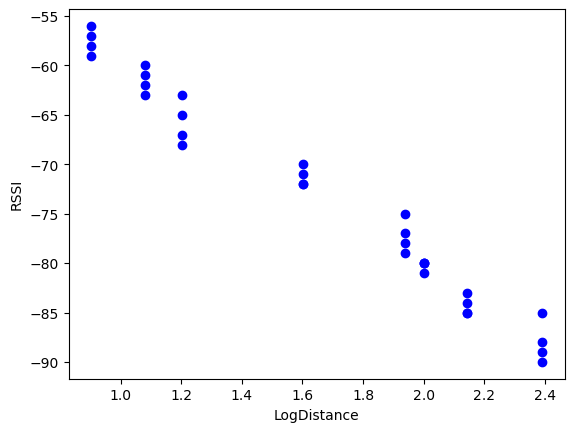

In [11]:
plt.ylabel('RSSI')
plt.xlabel('LogDistance')
print("Below is the scatter plot that i got using RSSI values and Distance in log scale:")
plt.scatter(LogDist, RSSIvallist, color='blue')

#### (d) Draw a best fit straight line corresponding to this log-log plot. Find out the slope of this line, divide it by 10 and take the absolute value, which is your path loss exponent.

The best fit line corresponding to recorded points is:


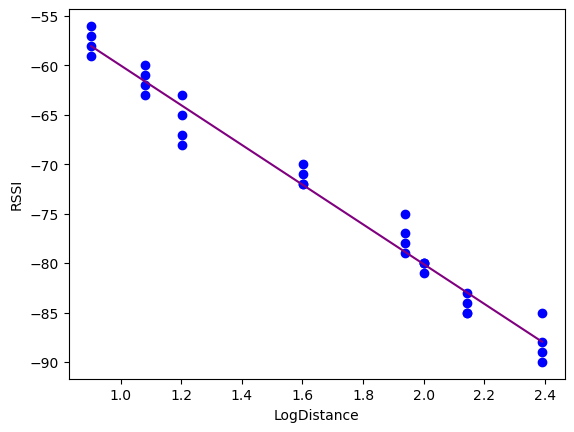

In [12]:
plt.ylabel('RSSI')
plt.xlabel('LogDistance')
slope, intercept = np.polyfit(LogDist,RSSIvallist , 1)
plt.scatter(LogDist, RSSIvallist, color='blue')
print("The best fit line corresponding to recorded points is:")
plt.plot(LogDist, slope*LogDist+intercept, color='purple')
pathlossexponent=abs(slope/10)

The best fit gives the slope and intercept,and now by dividing the slope value by 10 and taking its absolute value will give Pathloss Exponent


In [13]:
print("Slope is {} and Intercept is {}".format(slope,intercept))
print("The pathloss exponent is:",pathlossexponent)

Slope is -20.1050424983854 and Intercept is -39.889815926408914
The pathloss exponent is: 2.01050424983854


#### (e) Also find out the variance of these RSSI samples, w.r.t. the best fit line.

In [14]:
sumOfVar=0;
for i in range(len(LogDist)):
    Estimated_RSSI=slope*LogDist[i]+intercept
    sumOfVar+=(Estimated_RSSI-RSSIvallist[i])**2
Variance=sumOfVar/len(LogDist)
print("The variance of the RSSI samples w.r.t the best fit line is:",Variance)

The variance of the RSSI samples w.r.t the best fit line is: 2.6888420079145754


## Step 2: Range Estimation
### The purpose of this step is to find out the distance/range from the path loss exponent that you have found in the last step. 

#### (a) Now use the obtained path loss exponent for estimating some distances, using the following formula (I have ignored the noise term). Assume 𝑑0 as 1 meter, and find $[P_r(𝑑_0)]$ 𝑑𝐵. Then record $P_𝑟(𝑑)[𝑑𝐵𝑚]$ and estimate the distance 𝑑 from the corresponding equation.
#### (b) However, due to the noise there will be some errors in range/distance estimation. So, calculate the distance error by comparing with the actual distance. Repeat this experiment for 5 different distances, and report the average error.


$P_r(d)[dBm] = P_t[dBm] - P_L(d)[dB]$<br>
= $P_t[dBm] - P_L[d_0] - 10n \log_{10}\left(\frac{d}{d_0}\right)$<br>
=$ P_r(d_0)[dBm] - 10n \log_{10}\left(\frac{d}{d_0}\right)$<br>
Then d can be calculated by $ d = d_0* (10^{(P_r(d_0)[dBm] - P_r(d)[dBm])/10n })$

In [15]:
RSSIval=[-54,-71,-74,-82,-73]
Dist=[5,35,55,124,48]
Est_dist=[]
Dist_Err=[]
Prd0=intercept
for i in range(5):
    esti_dist=10**((Prd0-RSSIval[i])/(10*pathlossexponent))
    Est_dist.append(esti_dist)
    Dist_Err.append(abs(esti_dist-Dist[i]))
print("The estimated distanced using pathlossexponent are:")    
print(Est_dist)
print("The Distance Errors are:")    
print(Dist_Err)
avgerror=np.sum(Dist_Err)/5
print("The average distance error={}".format(avgerror))
    


The estimated distanced using pathlossexponent are:
[5.032956083728191, 35.268107775679596, 49.72770960563017, 124.31072031167285, 44.346534877764746]
The Distance Errors are:
[0.03295608372819103, 0.26810777567959576, 5.272290394369833, 0.31072031167285274, 3.6534651222352537]
The average distance error=1.907507937537145
